# Creating a xG Model

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load the df
df = pd.read_csv("xg_model.csv")

## 1. Exploratory Data Analysis

In [5]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each observation represents a shot and contains information about it such as if the player used his left foot or his right foot when shooting the ball.

The x and y variables helps us locate the place in the field where the shot was taken from and their values represent how far away from the team's own goal was the shot taken.
 - x represents the horizontal axis
 - y represents the vertical axis

In [6]:
print(f"Our dataset contains {df.shape[0]} shots and {df.shape[1]} different features describing the shot itself.")

Our dataset contains 8118 shots and 25 different features describing the shot itself.


In [7]:
print(df.x.max())
print(df.x.min())

99.6
0.8


In [8]:
print(df.y.max())
print(df.y.min())

99.6
3.1


To understand these values easier:
- Our own goal is located at (x,y) = (0, 50)
- The opposing team own goal is located at (x,y) = (100, 50)

In [9]:
# List of Columns
list(df.columns)

['x',
 'y',
 'is_goal',
 'period',
 'Assisted',
 'Zone',
 'IndividualPlay',
 'RegularPlay',
 'LeftFoot',
 'RightFoot',
 'FromCorner',
 'FirstTouch',
 'Head',
 'BigChance',
 'SetPiece',
 'Volley',
 'FastBreak',
 'ThrowinSetPiece',
 'Penalty',
 'OneOnOne',
 'KeyPass',
 'DirectFreekick',
 'OwnGoal',
 'OtherBodyPart',
 'DirectCorner']

In [10]:
# How many own goals do we have?
df.OwnGoal.value_counts()

OwnGoal
True    27
Name: count, dtype: int64

An own goal has no pratical value in xG model so we'll drop it.

In [11]:
# By doing this, we remove the shots that resulted in Own Goals
df = df[df["OwnGoal"] != True ]

In [12]:
# Now we can drop the column itself
df.drop('OwnGoal', axis = 1, inplace = True)

In [13]:
print(f"Our dataset now contains {df.shape[0]} shots and {df.shape[1]} features.")

Our dataset now contains 8091 shots and 24 features.


How many shots resulted in goals?

In [14]:
df.is_goal.value_counts()

is_goal
False    7097
True      994
Name: count, dtype: int64

Let's create a scatterplot to visualise from where the goals were scored.

<Axes: xlabel='x', ylabel='y'>

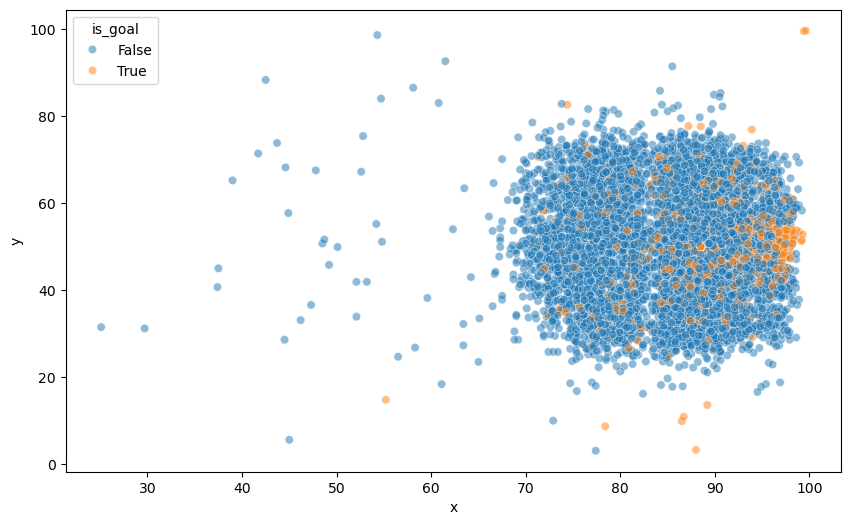

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(x='x', y = 'y', data =df, hue ='is_goal', alpha =.5)

In [16]:
df.isna().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
DirectFreekick     7860
OtherBodyPart      8067
DirectCorner       8089
dtype: int64

We have a lot of missing values, but from a football perspective, if the value is missing, we can infer that it is false.

E.g. If there is a missing value for Penalty, we will assume that the shot wasn't taken from the penalty spot.

In [17]:
df.fillna(0, inplace = True)

In [18]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
DirectFreekick      object
OtherBodyPart       object
DirectCorner        object
dtype: object

We need to change the data types of these features.

In [19]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool, 
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool, 
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [20]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
DirectFreekick      object
OtherBodyPart         bool
DirectCorner        object
dtype: object

## 2. Feature Engineering

Although we have x and y, having a feature that directly represents the distance to the goal is relevant.

In [21]:
# As I've explained before, the opposing team's goal is located at (100, 50)
goal_x = 100
goal_y = 50

df['shot_distance'] = np.sqrt((df['x'] - goal_x)**2 + (df['y'] - goal_y)**2)    

In [22]:
df.shot_distance.head()

0    19.266551
1    33.077636
2    22.141590
3    11.636151
4    16.323296
Name: shot_distance, dtype: float64

<Axes: >

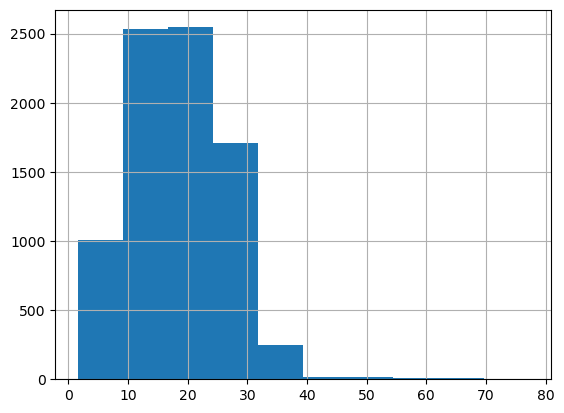

In [23]:
df.shot_distance.hist()

We can see that most of the shots are made from a distance of between 10 to 25 units. 

In [24]:
df.shot_distance.describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

We have two string features that we need to encode in order for them to be used by the model we're going to build:
- Period - if the shot was taken in the first or in the second half
- Zone - from which zone of the pitch was the shot taken from e.g. Center

In [25]:
df = pd.get_dummies(df, columns = ['period', 'Zone'])

In [26]:
list(df.columns)

['x',
 'y',
 'is_goal',
 'Assisted',
 'IndividualPlay',
 'RegularPlay',
 'LeftFoot',
 'RightFoot',
 'FromCorner',
 'FirstTouch',
 'Head',
 'BigChance',
 'SetPiece',
 'Volley',
 'FastBreak',
 'ThrowinSetPiece',
 'Penalty',
 'OneOnOne',
 'KeyPass',
 'DirectFreekick',
 'OtherBodyPart',
 'DirectCorner',
 'shot_distance',
 'period_FirstHalf',
 'period_SecondHalf',
 'Zone_Back',
 'Zone_Center',
 'Zone_Left',
 'Zone_Right']

In [27]:
df.period_FirstHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64

In [28]:
df.period_SecondHalf.value_counts()

period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

## 3. Model Building

We'll create a logistic regression that predicts if the shot resulted in a goal or not.

In [29]:
X = df.drop('is_goal', axis=1)
y = df['is_goal']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, roc_curve

We need to create a train:test split.

In [31]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2, random_state= 42)

The model I'll be using is a logistic regression that predicts if a shot resulted in a goal or not.

In [32]:
model = LogisticRegression(max_iter = 1000)

In [33]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [34]:
y_pred_proba = model.predict_proba (X_test)[:,1]

Let's see 10 examples of the predicted probability that a shot resulted in a goal.

In [35]:
y_pred_proba[:10]

array([0.07278437, 0.35709785, 0.03676592, 0.0365634 , 0.09975121,
       0.03682199, 0.03348756, 0.04684366, 0.04494578, 0.03915181])

In [36]:
final_df = X_test.copy()
final_df['goal_proba'] = y_pred_proba

Let's see an example of all the information we have about a shot, including the probability that it resulted in a goal.

In [37]:
final_df.iloc[30]

x                        92.3
y                        47.9
Assisted                 True
IndividualPlay          False
RegularPlay             False
LeftFoot                False
RightFoot               False
FromCorner               True
FirstTouch               True
Head                     True
BigChance                True
SetPiece                False
Volley                  False
FastBreak               False
ThrowinSetPiece         False
Penalty                 False
OneOnOne                False
KeyPass                 False
DirectFreekick              0
OtherBodyPart           False
DirectCorner                0
shot_distance        7.981228
period_FirstHalf        False
period_SecondHalf        True
Zone_Back               False
Zone_Center              True
Zone_Left               False
Zone_Right              False
goal_proba           0.242643
Name: 5156, dtype: object

We'll see the 5 shots that had the highest probability of scoring.

In [38]:
final_df.sort_values(by='goal_proba', ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,OtherBodyPart,DirectCorner,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_proba
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,0,11.5,False,True,False,True,False,False,0.825782
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,False,0,11.5,False,True,False,True,False,False,0.825782
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,0,11.5,False,True,False,True,False,False,0.825782
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,False,0,11.5,False,True,False,True,False,False,0.825782
473,88.5,50.0,False,False,False,True,False,False,False,False,...,False,0,11.5,True,False,False,True,False,False,0.823296


These 5 shots were taken from the penalty spot!

We'll use some metrics to evaluate how well did the model perform.

In [39]:
# Evaluate the model
logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")

Log Loss: 0.26997317837126755
ROC AUC: 0.8099227389789426
Brier Score: 0.07748568402783919


We can also plot the ROC Curve.

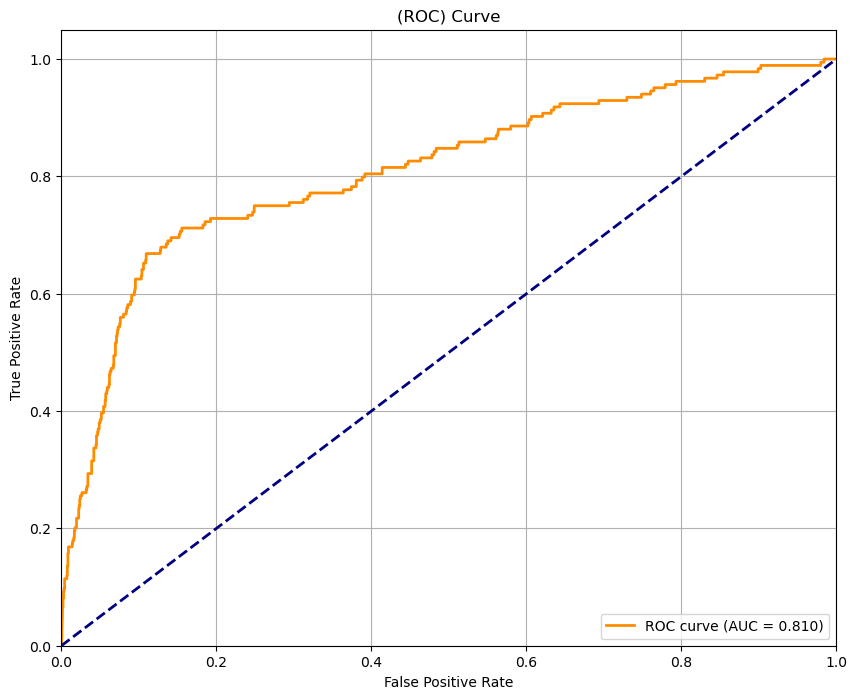

In [40]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 4. Visualising predictions

In [41]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type= 'opta')

In [42]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'yellow', 'green']

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

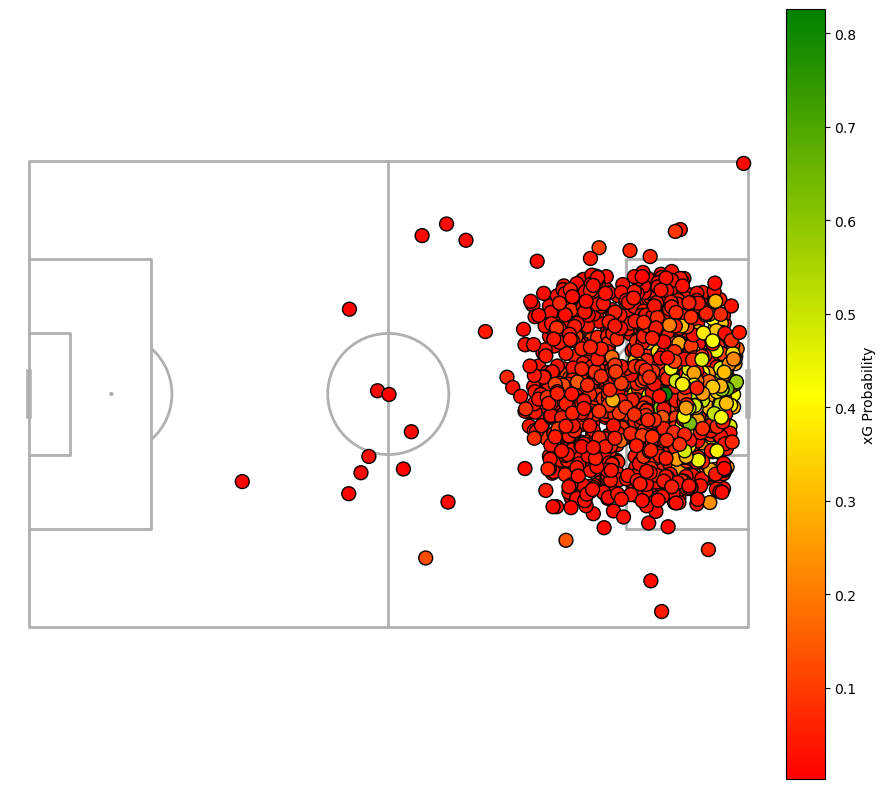

In [43]:
fig, ax = pitch.draw(figsize=(10, 8))

sc = pitch.scatter(
    final_df['x'],
    final_df['y'],
    c = final_df['goal_proba'],
    cmap = cmap,
    edgecolor = 'black',
    s=100,
    ax=ax
)

cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", fraction = 0.2, pad = 0.02)
cbar.set_label('xG Probability')

## 5. Improving the model

We can go further and use GridSearch Cross Validation to find the hyperparameters that maximise the model accuracy. 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report

lr = LogisticRegression()

# Define the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength (smaller = stronger regularization)
    'solver': ['liblinear', 'saga'],               # Solver for optimization
    'max_iter': [100, 500, 1000]                   # Maximum number of iterations
}

# Define the scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,               # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)          # Use all processors for parallelism

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/linear_m

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(roc_auc_score, response_method='predict_proba'),
             verbose=1)

Let's now visualise what the best parameters are and how have we improved the model by using GridSearch CV.

In [45]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {roc_auc:.4f}")

# Print classification report
y_pred = (y_pred_proba > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score: 0.8146211151746628
Test ROC AUC Score: 0.8173

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      1435
        True       0.61      0.18      0.28       184

    accuracy                           0.89      1619
   macro avg       0.76      0.58      0.61      1619
weighted avg       0.87      0.89      0.87      1619



As we can see, the improvement in the model accuracy by using Cross Validation was minimal.

# Next Steps

These were the first steps to understand what the path can be for this project.

1. **Get an expanded dataset**

The number of observations and features is clearly limited when compared to the state of the art xG models that companies like Statsbomb create.

I can achieve this by creating a script to extract information from websites like SofaScore or try finding an API that gives me more data.

2. **More Feature Engineering**

Creating additional features like:
 - Angle to Goal: Adding a feature that calculates the angle to goal from each shot position
 - Distance × Angle Interaction: Creating an interaction terms between distance and angle
 - Other features like pressure from defenders, goalkeeper position, or game state (winning/losing/drawing) if the new dataset includes them.

3. **Try other ML models**

Create more models and compare them against the logistic regression I have created.

# Improving

In [ ]:
final_df['shot_angle'] = 